In [1]:
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import math
import numpy as np
import pandas as pd

import csv
import os

In [188]:
# Load data

# Expects all relevant files to be in this folder
folder = 'FDs_20Size'
files = [f for f in os.listdir(folder) if 'Lung' in f]

df_list = []
for f in files:
    df_dict = {}
    with open(os.path.join(folder, f), 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        csv_data = list(csv_reader)
    
    sc_arr = np.asarray(csv_data[4:]).astype(int)
    sizes, counts = sc_arr[:, 0], sc_arr[:, 1]
    
    df_dict = {
        'SID':                 '_'.join(f.split('_')[:-2]),
        'Lobe':                '',
        'Fractal_Dimension':   float(csv_data[0][1]),
        'Coefficients':        np.array([csv_data[1][1], csv_data[2][1]]).astype(float),
        'Sizes':               sizes,
        'Counts':              counts,
    }
    
    if 'left' in f:
        df_dict['Lobe'] = 'left'
    elif 'right' in f:
        df_dict['Lobe'] = 'right'
    else:
        df_dict['Lobe'] = 'whole'
    
    df_list.append(df_dict)

df = pd.DataFrame(df_list)
display(df)

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts
0,001_pect_phfirst_060413,left,2.293488,"[-2.2934882549471287, 13.89135157142404]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1029, 1369, 1821, 2549, 3772, 5832, 9867, 186..."
1,001_pect_phfirst_060413,right,2.387708,"[-2.3877078335513184, 14.474074663156177]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1387, 1833, 2487, 3555, 5310, 8468, 14778, 28..."
2,001_pect_phfirst_060413,whole,2.349353,"[-2.3493533857361224, 14.913757624404376]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[2428, 3199, 4305, 6094, 9086, 14345, 24633, 4..."
3,002_pect_phfirst_050913,left,2.309285,"[-2.3092848551082272, 13.74143447223712]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[855, 1127, 1499, 2085, 3078, 4825, 8237, 1575..."
4,002_pect_phfirst_050913,right,2.249075,"[-2.2490754885686197, 13.883207026644651]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1168, 1517, 2043, 2852, 4165, 6472, 10819, 20..."
...,...,...,...,...,...,...
671,387_pect_phfirst_090117,right,2.275040,"[-2.2750395130180974, 13.724910373315405]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[912, 1186, 1590, 2267, 3306, 5228, 8992, 1716..."
672,387_pect_phfirst_090117,whole,2.280115,"[-2.2801145828362044, 14.413922526242429]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1795, 2315, 3143, 4434, 6504, 10304, 17724, 3..."
673,388_pect_phfirst_080516,left,2.270248,"[-2.270248247324925, 12.54319887200194]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[306, 381, 502, 695, 983, 1573, 2648, 5077, 12..."
674,388_pect_phfirst_080516,right,2.315987,"[-2.3159873162031817, 12.927500778445133]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[373, 482, 646, 902, 1336, 2114, 3648, 7071, 1..."


In [189]:
# Generate Stats!

r_squared_list = []
residuals_list = []
pairwise_slopes_list = []
for index, row in df.iterrows():
    sizes_log = np.log(row['Sizes'])
    counts_log = np.log(row['Counts'])
    coeffs = row['Coefficients']
    
    # Calculate R Squared
    correlation_matrix = np.corrcoef(sizes_log, counts_log)
    r_squared = correlation_matrix[0, 1]**2
    r_squared_list.append(r_squared)
    
    # Calculate Residuals
    residuals = counts_log - np.polyval(coeffs, sizes_log)
    residuals_list.append(residuals)
    
    # Calculate Pairwise Slopes
    pairwise_slopes = (counts_log[1:] - counts_log[:-1]) / (sizes_log[1:] - sizes_log[:-1])
    pairwise_slopes_list.append(pairwise_slopes)

df['R_Squared'] = r_squared_list
df['Residuals'] = residuals_list
df['Pairwise_Slopes'] = pairwise_slopes_list

df

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts,R_Squared,Residuals,Pairwise_Slopes
0,001_pect_phfirst_060413,left,2.293488,"[-2.2934882549471287, 13.89135157142404]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1029, 1369, 1821, 2549, 3772, 5832, 9867, 186...",0.998878,"[-0.0843320512278547, -0.04048206696985268, -0...","[-2.7096781718644936, -2.422294966751413, -2.5..."
1,001_pect_phfirst_060413,right,2.387708,"[-2.3877078335513184, 14.474074663156177]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1387, 1833, 2487, 3555, 5310, 8468, 14778, 28...",0.998397,"[-0.08624282605398026, -0.059002127112305125, ...","[-2.646255343228885, -2.590552996561038, -2.67..."
2,001_pect_phfirst_060413,whole,2.349353,"[-2.3493533857361224, 14.913757624404376]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[2428, 3199, 4305, 6094, 9086, 14345, 24633, 4...",0.998642,"[-0.08090071259194609, -0.0526594090054342, -0...","[-2.617397855812836, -2.5210665972185744, -2.6..."
3,002_pect_phfirst_050913,left,2.309285,"[-2.3092848551082272, 13.74143447223712]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[855, 1127, 1499, 2085, 3078, 4825, 8237, 1575...",0.998929,"[-0.07233383402319227, -0.03942823205518753, -...","[-2.6215992146437372, -2.4217323188626976, -2...."
4,002_pect_phfirst_050913,right,2.249075,"[-2.2490754885686197, 13.883207026644651]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1168, 1517, 2043, 2852, 4165, 6472, 10819, 20...",0.998601,"[-0.08253083649225523, -0.058052773760863374, ...","[-2.4814022058266096, -2.5273980570304384, -2...."
...,...,...,...,...,...,...,...,...,...
671,387_pect_phfirst_090117,right,2.275040,"[-2.2750395130180974, 13.724910373315405]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[912, 1186, 1590, 2267, 3306, 5228, 8992, 1716...",0.997472,"[-0.09386109048220437, -0.07085883723238151, -...","[-2.493358995475136, -2.4888789291509386, -2.6..."
672,387_pect_phfirst_090117,whole,2.280115,"[-2.2801145828362044, 14.413922526242429]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1795, 2315, 3143, 4434, 6504, 10304, 17724, 3...",0.997517,"[-0.09054938211653774, -0.07637876472513394, -...","[-2.41461105243801, -2.5960281000845566, -2.57..."
673,388_pect_phfirst_080516,left,2.270248,"[-2.270248247324925, 12.54319887200194]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[306, 381, 502, 695, 983, 1573, 2648, 5077, 12...",0.999344,"[-0.01855782655889815, -0.038538079394007774, ...","[-2.0806112404218946, -2.3415999004274295, -2...."
674,388_pect_phfirst_080516,right,2.315987,"[-2.3159873162031817, 12.927500778445133]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[373, 482, 646, 902, 1336, 2114, 3648, 7071, 1...",0.998437,"[-0.06784441050975332, -0.05549233399512232, -...","[-2.433223611389387, -2.486397027381507, -2.49..."


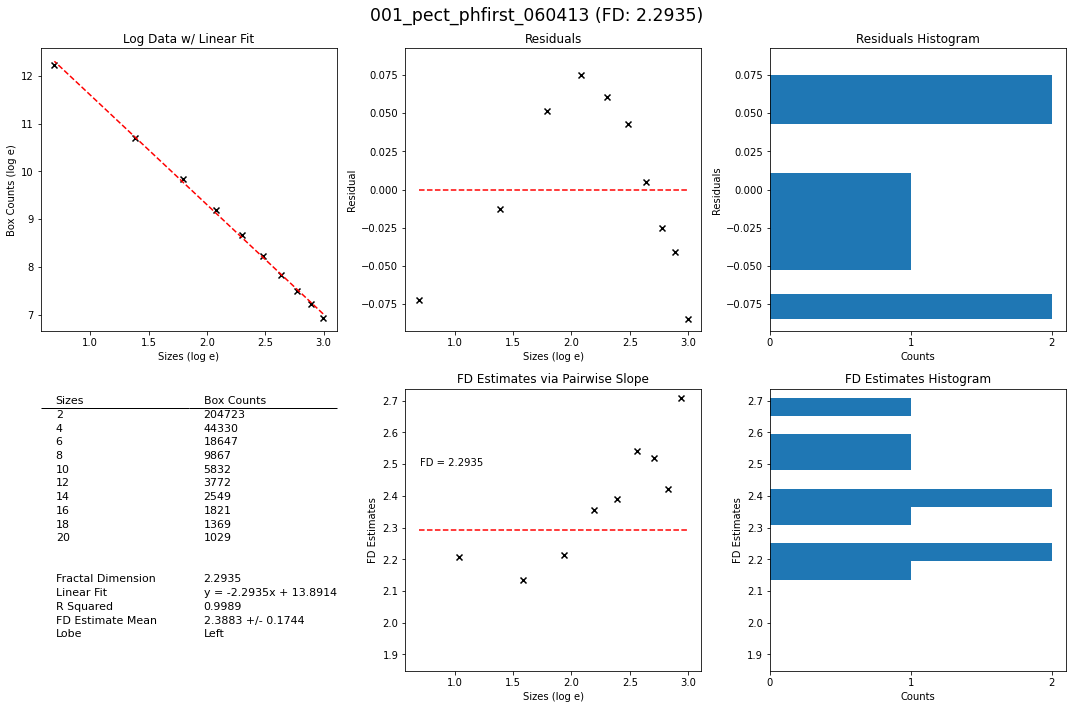

In [196]:
# Generate Figures!

# Create folders for each lobe
lobes = ['Left', 'Right', 'Whole']
for lobe in lobes:
    os.makedirs(lobe, exist_ok=True)

for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    plt.suptitle(f'{sid} (FD: {fd:.4f})', fontsize='xx-large')

    # Log Size vs Log Count w/ Linear Fit
    axes[0, 0].plot(sizes_log, np.polyval(coeffs, sizes_log), 'r--')
    axes[0, 0].scatter(sizes_log, counts_log, c='k', marker='x')
    axes[0, 0].set_title('Log Data w/ Linear Fit')
    axes[0, 0].set_xlabel('Sizes (log e)')
    axes[0, 0].set_ylabel('Box Counts (log e)')

    # Residuals w/ Mean Line
    axes[0, 1].hlines(0, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[0, 1].scatter(sizes_log, residuals, c='k', marker='x')
    axes[0, 1].set_title('Residuals')
    axes[0, 1].set_xlabel('Sizes (log e)')
    axes[0, 1].set_ylabel('Residual')
    yabs_max = abs(max(axes[0, 1].get_ylim(), key=abs))
    axes[0, 1].set_ylim(-yabs_max, yabs_max)

    # Residuals Hist
    axes[0, 2].hist(residuals, orientation='horizontal')
    axes[0, 2].set_title('Residuals Histogram')
    axes[0, 2].set_xlabel('Counts')
    axes[0, 2].set_ylabel('Residuals')
    axes[0, 2].set_ylim(-yabs_max, yabs_max)
    axes[0, 2].set_xticks([i for i in axes[0, 2].get_xticks() if not i % 1])

    # Pairwise_Slope w/ FD Line
    axes[1, 1].hlines(fd, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[1, 1].scatter(sizes_log_half, -pairwise_slopes, c='k', marker='x')
    axes[1, 1].set_title('FD Estimates via Pairwise Slope')
    axes[1, 1].set_xlabel('Sizes (log e)')
    axes[1, 1].set_ylabel('FD Estimates')
#     axes[1, 1].text(max(sizes_log)-4.1, fd+0.02, f'FD = {fd:.5}')
    axes[1, 1].text(0.7, fd+0.2, f'FD = {fd:.5}')
    yabs_max = abs(max(axes[1, 1].get_ylim()-fd, key=abs))
    axes[1, 1].set_ylim(fd-yabs_max, fd+yabs_max)

    # Pairwise_Slope Hist
    axes[1, 2].hist(-pairwise_slopes, orientation='horizontal')
    axes[1, 2].set_title('FD Estimates Histogram')
    axes[1, 2].set_xlabel('Counts')
    axes[1, 2].set_ylabel('FD Estimates')
    axes[1, 2].set_ylim(fd-yabs_max, fd+yabs_max)
    axes[1, 2].set_xticks([i for i in axes[1, 2].get_xticks() if not i % 1])

    # Data Table
    fd_estimate_mean = np.mean(-pairwise_slopes)
    fd_estimate_std = np.std(-pairwise_slopes)

    sizes = df['Sizes'][num][::-1]
    boxes = df['Counts'][num][::-1]
    
    # Add to Table
    cells = [['Sizes', 'Box Counts']]
    for size, count in zip(sizes, boxes):
        cells.append([str(size), str(count)])
    for i in range(0, 12-len(sizes)):
        cells.append(['', ''])

    cells.append(['Fractal Dimension', f'{fd:.4f}'])
    cells.append(['Linear Fit', f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}'])
    cells.append(['R Squared', f'{r_squared:.4f}'])
    cells.append(['FD Estimate Mean', f'{fd_estimate_mean:.4f} +/- {fd_estimate_std:.4f}'])
    cells.append(['Lobe', f'{lobe.capitalize()}'])

    axes[1, 0].axis('tight')
    axes[1, 0].axis('off')
    table = axes[1, 0].table(cells, cellLoc='left', loc='upper center')

    # More Table Shenanigans
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    for c in table.get_celld().values():
        c.visible_edges = ''
    table[(0, 0)].visible_edges = 'B'
    table[(0, 1)].visible_edges = 'B'

    plt.tight_layout()
    plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticles_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    
    if num > 1:
        break
    
#     # Close all figures except for the first to double check
#     if num > 0:
#         plt.close(fig)

In [177]:
keys = ['left', 'right', 'whole']
upper = {key: [] for key in keys}
lower = {key: [] for key in keys}

for num in range(0, len(df)):
    lobe = df['Lobe'][num]
    
    # FD > 3 and FD < 2
    upper[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] > 3)])
    lower[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] < 2)])

for key in keys:
    

In [184]:
display([f'{key} Mean: {np.mean(upper[key])} +/- {np.std(upper[key])}' for key in keys])
display([f'{key} Mean: {np.mean(lower[key])} +/- {np.std(lower[key])}' for key in keys])


['left Mean: 40.54222222222222 +/- 8.774166345683698',
 'right Mean: 40.60444444444445 +/- 8.37928545231382',
 'whole Mean: 47.10619469026549 +/- 8.950070778242317']

['left Mean: 33.093333333333334 +/- 6.176313175709636',
 'right Mean: 35.26222222222222 +/- 6.26295240597485',
 'whole Mean: 36.610619469026545 +/- 6.686313624243545']